# MuscleHub AB Test

Codecademy Intense course 'Introduction to Data Analysis' project

Currently, when a visitor to MuscleHub is considering buying a membership, he or she follows the following steps:

- Take a fitness test with a personal trainer

- Fill out an application for the gym

- Send in their payment for their first month's membership

The manager of MuscleHub, thinks that the fitness test intimidates some prospective members, so she has set up an A/B test.

Visitors will randomly be assigned to one of two groups:

Group A will still be asked to take a fitness test with a personal trainer
Group B will skip the fitness test and proceed directly to the application

The hypothesis is that visitors assigned to Group B will be more likely to eventually purchase a membership to MuscleHub.

### Getting datasets

- `visits` contains information about potential gym customers who have visited MuscleHub
- `fitness_tests` contains information about potential customers in "Group A", who were given a fitness test
- `applications` contains information about any potential customers (both "Group A" and "Group B") who filled out an application.  Not everyone in `visits` will have filled out an application.
- `purchases` contains information about customers who purchased a membership to MuscleHub.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
visits = pd.read_csv('visits.csv')
visits.head()

,first_name,last_name,email,gender,visit_date
0,Karen,Manning,Karen.Manning@gmail.com,female,5-1-17
1,Annette,Boone,AB9982@gmail.com,female,5-1-17
2,Salvador,Merritt,SalvadorMerritt12@outlook.com,male,5-1-17
3,Martha,Maxwell,Martha.Maxwell@gmail.com,female,5-1-17
4,Andre,Mayer,AndreMayer90@gmail.com,male,5-1-17


In [3]:
applications = pd.read_csv('applications.csv')
applications.head()

,first_name,last_name,email,gender,application_date
0,Roy,Abbott,RoyAbbott32@gmail.com,male,2017-08-12
1,Agnes,Acevedo,AgnesAcevedo1@gmail.com,female,2017-09-29
2,Roberta,Acevedo,RA8063@gmail.com,female,2017-09-15
3,Darren,Acosta,DAcosta1996@hotmail.com,male,2017-07-26
4,Vernon,Acosta,VAcosta1975@gmail.com,male,2017-07-14


In [4]:
fitness_test = pd.read_csv('fitness_tests.csv')
fitness_test.head()

,first_name,last_name,email,gender,fitness_test_date
0,Kim,Walter,KimWalter58@gmail.com,female,2017-07-03
1,Tom,Webster,TW3857@gmail.com,male,2017-07-02
2,Marcus,Bauer,Marcus.Bauer@gmail.com,male,2017-07-01
3,Roberta,Best,RB6305@hotmail.com,female,2017-07-02
4,Carrie,Francis,CF1896@hotmail.com,female,2017-07-05


In [5]:
purchases = pd.read_csv('purchases.csv')
purchases.head()

,first_name,last_name,email,gender,purchase_date
0,Roy,Abbott,RoyAbbott32@gmail.com,male,2017-08-18
1,Roberta,Acevedo,RA8063@gmail.com,female,2017-09-16
2,Vernon,Acosta,VAcosta1975@gmail.com,male,2017-07-20
3,Darren,Acosta,DAcosta1996@hotmail.com,male,2017-07-27
4,Dawn,Adkins,Dawn.Adkins@gmail.com,female,2017-08-24


Merging all tables into one, where date in visit_date is on or after 7-1-17 (date when A/B test started)

In [6]:
df = pd.merge(visits, fitness_test, how='left')

In [7]:
df = pd.merge(df, applications, how='left')

In [8]:
df = pd.merge(df, purchases, how='left')

In [9]:
df = df[df.visit_date >= '7-1-17']
df.shape

(5004, 8)

In [10]:
df.head()

,first_name,last_name,email,gender,visit_date,fitness_test_date,application_date,purchase_date
1000,Kim,Walter,KimWalter58@gmail.com,female,7-1-17,2017-07-03,NaN,NaN
1001,Tom,Webster,TW3857@gmail.com,male,7-1-17,2017-07-02,NaN,NaN
1002,Edward,Bowen,Edward.Bowen@gmail.com,male,7-1-17,NaN,2017-07-04,2017-07-04
1003,Marcus,Bauer,Marcus.Bauer@gmail.com,male,7-1-17,2017-07-01,2017-07-03,2017-07-05
1004,Roberta,Best,RB6305@hotmail.com,female,7-1-17,2017-07-02,NaN,NaN


## Fitness test step

Adding a column called ab_test_group. It should be A if fitness_test_date is not None, and B if fitness_test_date is None.

In [11]:
df['ab_test_group'] = df.fitness_test_date.apply(lambda x: 'A' if pd.notna(x) else 'B')

In [12]:
ab_counts = df.groupby(['ab_test_group']).first_name.count().reset_index()
ab_counts

,ab_test_group,first_name
0,A,2504
1,B,2500


Making a pie chart for groups A and B

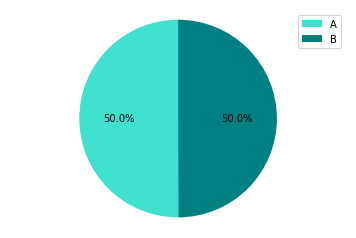

In [13]:
plt.pie(ab_counts.first_name.values, autopct='%0.1f%%', colors=['turquoise', 'teal'], startangle=90)
plt.axis('equal')
plt.legend(['A', 'B'])
plt.savefig('ab_test_pie_chart.png')
plt.show()

## Application step

Making a column is_application to see who filled out the applications.

In [14]:
df['is_application'] = df.application_date.apply(lambda x: 'Application' if pd.notna(x) else 'No Application')

We need to count how many people from Group A and Group B either do or don't pick up an application.

In [15]:
app_counts = df.groupby(['ab_test_group', 'is_application']).first_name.count().reset_index()
app_counts

,ab_test_group,is_application,first_name
0,A,Application,250
1,A,No Application,2254
2,B,Application,325
3,B,No Application,2175


Creating a bar chart

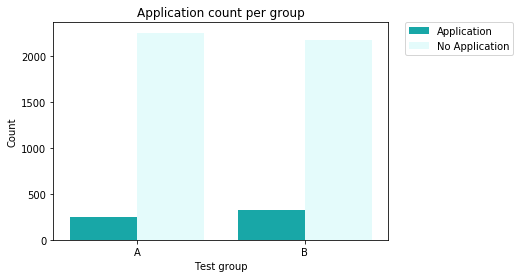

In [16]:
barplot = sns.barplot(data=app_counts, x='ab_test_group', 
                      y='first_name', 
                      hue='is_application',
                      palette=['c', 'lightcyan'])

barplot.set(xlabel='Test group', ylabel='Count', title='Application count per group')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show();

Creating a pivot table

In [17]:
app_pivot = app_counts.pivot(columns='is_application',
                             index='ab_test_group',
                             values='first_name').reset_index()
app_pivot

is_application,ab_test_group,Application,No Application
0,A,250,2254
1,B,325,2175


In [18]:
app_pivot['Total'] = app_pivot['Application'] + app_pivot['No Application']

Calculating the percent of people in each group who complete an application. 

In [19]:
app_pivot['Percent with Application'] = app_pivot.Application / app_pivot.Total * 100
app_pivot

is_application,ab_test_group,Application,No Application,Total,Percent with Application
0,A,250,2254,2504,9.984026
1,B,325,2175,2500,13.000000


### Using a hypothesis test

It looks like more people from Group B turned in an application. 

We need to know if this difference is statistically significant.

We goona use Chi Square Test for categorical datasets.

In [20]:
from scipy.stats import chi2_contingency

# application and no application count
c = [[250, 2254],
     [325, 2175]]
_, pval, _, _ = chi2_contingency(c)
 
if pval < 0.05:
    print('{} - is our P value, the difference is significant.'.format(pval))
else:
    print('The difference isn\'t significant enough.')


0.0009647827600722304 - is our P value, the difference is significant.


## Membership step

Of those who picked up an application, how many purchased a membership?

Let's begin by adding a column to `df` called `is_member` which is `Member` if `purchase_date` is not `None`, and `Not Member` otherwise.

In [21]:
df['is_member'] = df.purchase_date.apply(lambda x: 'Member' if pd.notna(x) else 'Not Member')

Creating a DataFrame called just_apps the contains only people who picked up an application.

In [22]:
just_apps = df[df.is_application == 'Application']

Let's do a `groupby` to find out how many people in `just_apps` are and aren't members from each group.

In [23]:
member_count = just_apps.groupby(['ab_test_group', 'is_member']).first_name.count().reset_index()

member_pivot = member_count.pivot(columns='is_member',
                                  index='ab_test_group',
                                  values='first_name').reset_index()

member_pivot['Total'] = member_pivot.Member + member_pivot['Not Member']
member_pivot['Percent Purchase'] = member_pivot.Member / member_pivot.Total * 100
member_pivot

is_member,ab_test_group,Member,Not Member,Total,Percent Purchase
0,A,200,50,250,80.000000
1,B,250,75,325,76.923077


### Hypothesis test

In [24]:
x = [[200, 50], [250, 75]]
_, pval, _, _ = chi2_contingency(x)

if pval < 0.05:
    print('{} - is our P value, the difference is significant.'.format(pval))
else:
    print('{} - The difference isn\'t significant enough.'.format(pval))

0.43258646051083327 - The difference isn't significant enough.


What percentage of **all visitors** purchased memberships.

In [25]:
final_member_count = df.groupby(['ab_test_group', 'is_member']).first_name.count().reset_index()

final_member_pivot = final_member_count.pivot(columns='is_member',
                                              index='ab_test_group',
                                              values='first_name').reset_index()

final_member_pivot['Total'] = final_member_pivot.Member + final_member_pivot['Not Member']
final_member_pivot['Percent Purchase'] = final_member_pivot.Member / final_member_pivot.Total * 100
final_member_pivot

is_member,ab_test_group,Member,Not Member,Total,Percent Purchase
0,A,200,2304,2504,7.98722
1,B,250,2250,2500,10.00000


In [26]:
x = [[200, 2304], [250, 2250]]
_, pval, _, _ = chi2_contingency(x)
pval

0.014724114645783203

When we consider all people who **visit MuscleHub**, we see that there might be a significant different in memberships between Group A and Group B. 

## Summarize

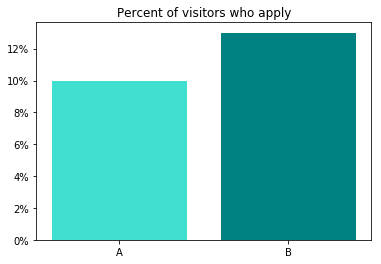

In [27]:
ax = plt.subplot()
ax.bar(range(len(app_pivot)), app_pivot['Percent with Application'].values, color=['turquoise', 'teal'])
ax.set_xticks(range(len(app_pivot)))
ax.set_xticklabels(['A', 'B'])
ax.set_yticklabels(['0%', '2%', '4%', '6%', '8%', '10%', '12%'])
plt.title('Percent of visitors who apply')
plt.show()

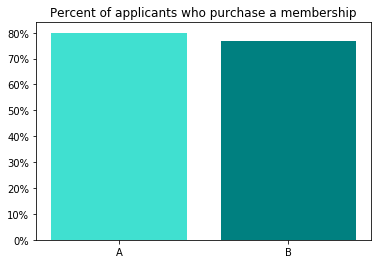

In [28]:
ax = plt.subplot()
ax.bar(range(len(member_pivot)), member_pivot['Percent Purchase'].values, color=['turquoise', 'teal'])
ax.set_xticks(range(len(member_pivot)))
ax.set_xticklabels(['A', 'B'])
ax.set_yticklabels(['0%', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%'])
plt.title('Percent of applicants who purchase a membership')
plt.show()

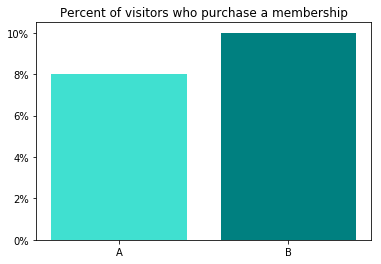

In [29]:
ax = plt.subplot()
ax.bar(range(len(final_member_pivot)), final_member_pivot['Percent Purchase'].values, color=['turquoise', 'teal'])
ax.set_xticks(range(len(final_member_pivot)))
ax.set_xticklabels(['A', 'B'])
ax.set_yticklabels(['0%', '2%', '4%', '6%', '8%', '10%'])
plt.title('Percent of visitors who purchase a membership')
plt.show()